In [ ]:
from diffusers import DiffusionPipeline
import torch

# load both base & refiner
base = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

# prompt = "A majestic lion jumping from a big stone at night"
prompt = "an indian boy chased by his sister for stealing her lipstick"

# run both experts
image = base(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
).images
image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
).images[0]


image.save("boy.jpg")

In [ ]:
from diffusers import AutoPipelineForImage2Image
import torch
from PIL import Image

# load both base & refiner
base = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

img= Image.open("lion_init.jpg")
# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 40
high_noise_frac = 0.8

prompt = "lion,white background,day time,rainbow"
# run both experts
image = base(
    prompt=prompt,
    image= img,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
    # strength=0.99
).images

image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
    strength=0.6
).images[0]


image.save("lion.jpg")

In [ ]:
from diffusers.utils import make_image_grid, load_image


In [ ]:
init_image = load_image(img).resize((512, 512))

make_image_grid([init_image, image.resize((512, 512))], rows=1, cols=2)

In [ ]:

from PIL import Image
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image


img= Image.open("image.png")
init_image = load_image(img).resize((512, 512))

pipe = AutoPipelineForImage2Image.from_pretrained(
    # "stabilityai/stable-diffusion-xl-refiner-1.0",
    "stabilityai/stable-diffusion-xl-base-1.0", 
    torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe.to("cuda")



prompt = "white background, 8k"

# pass prompt and image to pipeline
# image = pipe(prompt, image=init_image, strength=1, guidance_scale=0.5).images[0]
image = pipe(prompt, image=img, strength=0.9, guidance_scale=10.0).images[0]
image.save("image2.jpg")
make_image_grid([init_image, image], rows=1, cols=2)



In [ ]:
# images.save("image.jpg")

In [ ]:
# from diffusers import AutoPipelineForImage2Image
# from diffusers.utils import load_image
# from PIL import Image
# import torch

# # pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
# pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16")
# pipe.to("cuda")

# img= Image.open("image.jpg")
# init_image = load_image(img).resize((512, 512))
# prompt = "Reconstruct the image and remove bag from the background"

# image = pipe(prompt, image=init_image, num_inference_steps=100, guidance_scale=0.0).images[0]
# image.save("image2.jpg")



In [ ]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import make_image_grid, load_image

import torch
from PIL import Image


# load both base & refiner
base = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
base.to("cuda")
refiner = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0",
    text_encoder_2=base.text_encoder_2,
    vae=base.vae,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
)
refiner.to("cuda")

img= Image.open("newbie.jpg")
# Define how many steps and what % of steps to be run on each experts (80/20) here
n_steps = 2
high_noise_frac = 0.8

prompt = ""
# run both experts
image = base(
    prompt=prompt,
    image= img,
    num_inference_steps=n_steps,
    denoising_end=high_noise_frac,
    output_type="latent",
    strength=0.99
).images

image = refiner(
    prompt=prompt,
    num_inference_steps=n_steps,
    denoising_start=high_noise_frac,
    image=image,
    strength=0.8,
     guidance_scale=10.0
).images[0]


# image.save("new image of light.jpg")

init_image = load_image(img).resize((512, 512))

make_image_grid([init_image, image.resize((512, 512))], rows=1, cols=2)

In [ ]:
# from diffusers import AutoPipelineForImage2Image
# from diffusers.utils import make_image_grid, load_image

# import torch
# from PIL import Image

# from diffusers import StableDiffusionImg2ImgPipeline

# device = "cuda"
# model_id_or_path = "stabilityai/stable-diffusion-xl-base-1.0"
# # model_id_or_path = "runwayml/stable-diffusion-v1-5"
# model_id_or_path = "stabilityai/stable-diffusion-xl-refiner-1.0"
# pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16, variant="fp16", use_safetensors=True
# )
# pipe = pipe.to(device)


# init_image = Image.open("newbie.jpg").convert("RGB")
# init_image = init_image.resize((768, 512))


# # Define how many steps and what % of steps to be run on each experts (80/20) here
# n_steps = 2
# # high_noise_frac = 0.8



In [ ]:
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image
from diffusers.utils import make_image_grid, load_image


pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)

In [ ]:

init_image = Image.open("newbie.jpg").convert("RGB")
init_image = init_image.resize((768, 512))
prompt = "Construct the full image of solar panel"
image = pipe(prompt=prompt, image=init_image, strength=.91 
            #  guidance_scale=7.5
             ).images[0]

init_image = load_image(init_image).resize((512, 512))

make_image_grid([init_image, image.resize((512, 512))], rows=1, cols=2)


In [ ]:
# from io import  BytesIO
# import requests

# url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# response = requests.get(url)
# init_image = Image.open(BytesIO(response.content)).convert("RGB")
# init_image = init_image.resize((768, 512))

# prompt = "A fantasy landscape, trending on artstation"

# images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images
# images[0].save("fantasy_landscape.png")

In [1]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline, AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipe = AutoPipelineForImage2Image.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", 
    # "kandinsky-community/kandinsky-2-2-decoder",
    torch_dtype=torch.float16, 
    variant="fp16", 
    use_safetensors=True
)
pipe = pipe.to("cuda")

/home/ubuntu/StableDiffusionTesting/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]























































diffusion_pytorch_model.fp16.safetensors: 100%|██████████| 167M/167M [00:02<00:00, 77.8MB/s]









diffusion_pytorch_model.fp16.safetensors: 100%|██████████| 167M/167M [00:02<00:00, 59.7MB/s]






















































































































































































































































model.fp16.safetensors: 100%|██████████| 1.39G/1.39G [00:26<00:00, 51.9MB/s]
diffusion_pytorch_model.fp16.safetensors: 100%|██████████| 4.52G/4.52G [00:33<00:00, 133MB/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacty of 14.58 GiB of which 17.62 MiB is free. Process 4796 has 11.26 GiB memory in use. Including non-PyTorch memory, this process has 3.30 GiB memory in use. Of the allocated memory 3.09 GiB is allocated by PyTorch, and 116.68 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

  3%|▎         | 1/30 [00:00<00:03,  8.28it/s]

100%|██████████| 30/30 [00:03<00:00,  8.25it/s]


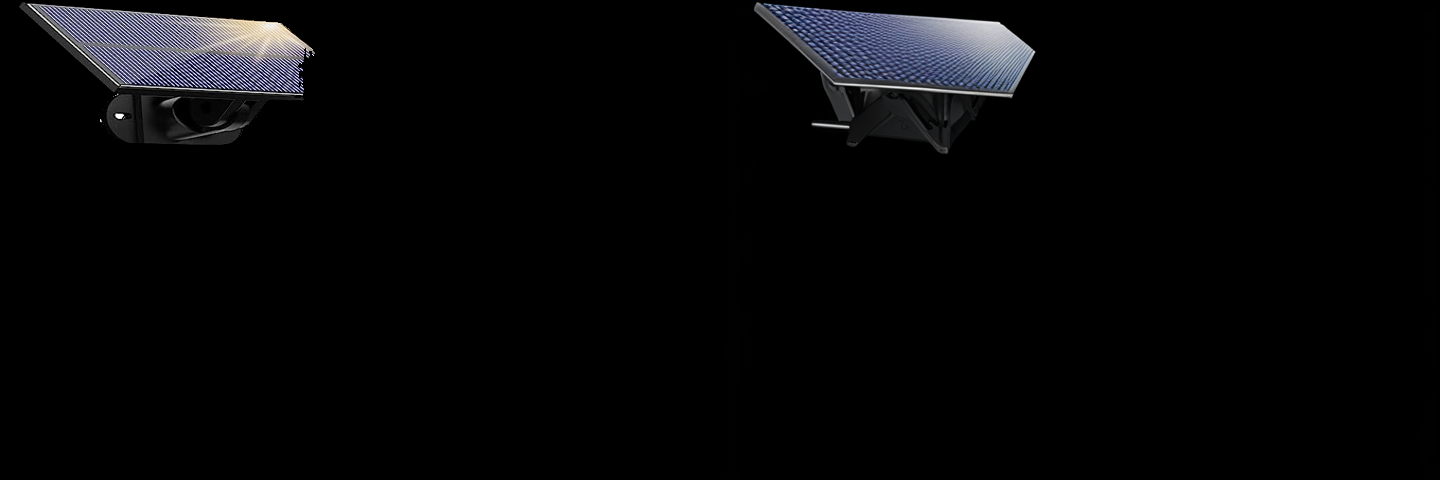

In [ ]:

url = "newbie.jpg"

init_image = load_image(url).convert("RGB")
prompt = "reconstruct the solar panel with smooth edges, 16k"
image = pipe(prompt, image=init_image, strength=0.6, guidance_scale=7, num_inference_steps=50).images
image[0]

make_image_grid([init_image, image[0]], rows=1, cols=2)



  3%|▎         | 1/35 [00:00<00:04,  8.28it/s]

100%|██████████| 35/35 [00:04<00:00,  8.26it/s]


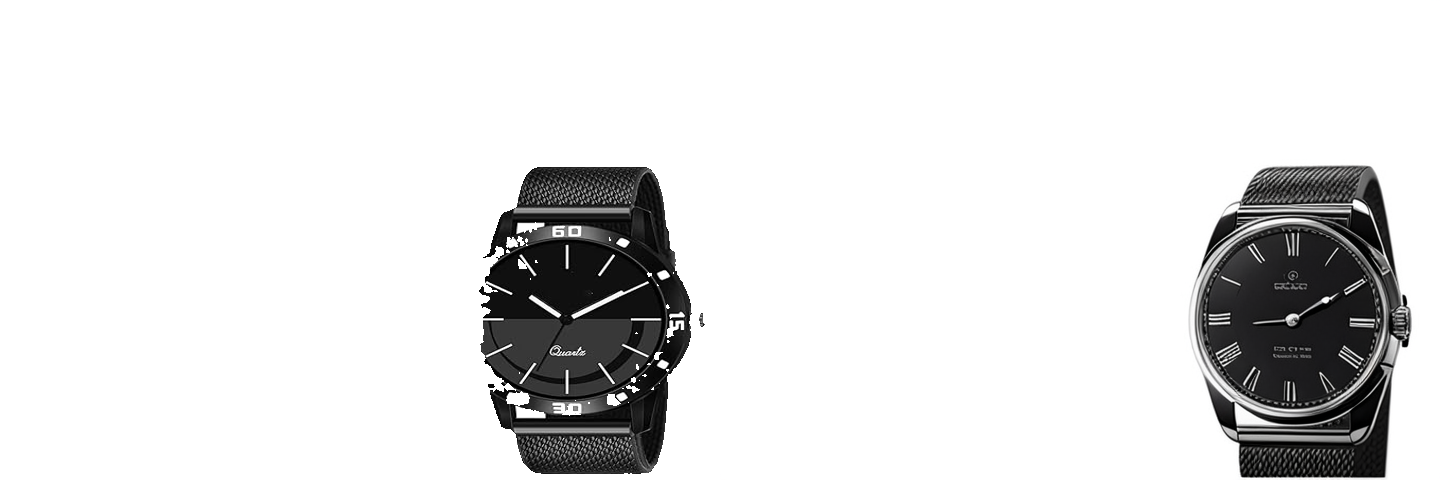

In [6]:

url = "watch-1.png"

init_image = load_image(url).convert("RGB")
prompt = "black watch of 'quartz', 16k"
image = pipe(prompt, image=init_image, strength=0.7, guidance_scale=10.0).images
# image[0].save("white_background.png")

# image[0]

make_image_grid([init_image, image[0]], rows=1, cols=2)




 50%|█████     | 1/2 [00:00<00:00,  8.30it/s]

100%|██████████| 2/2 [00:00<00:00,  8.25it/s]


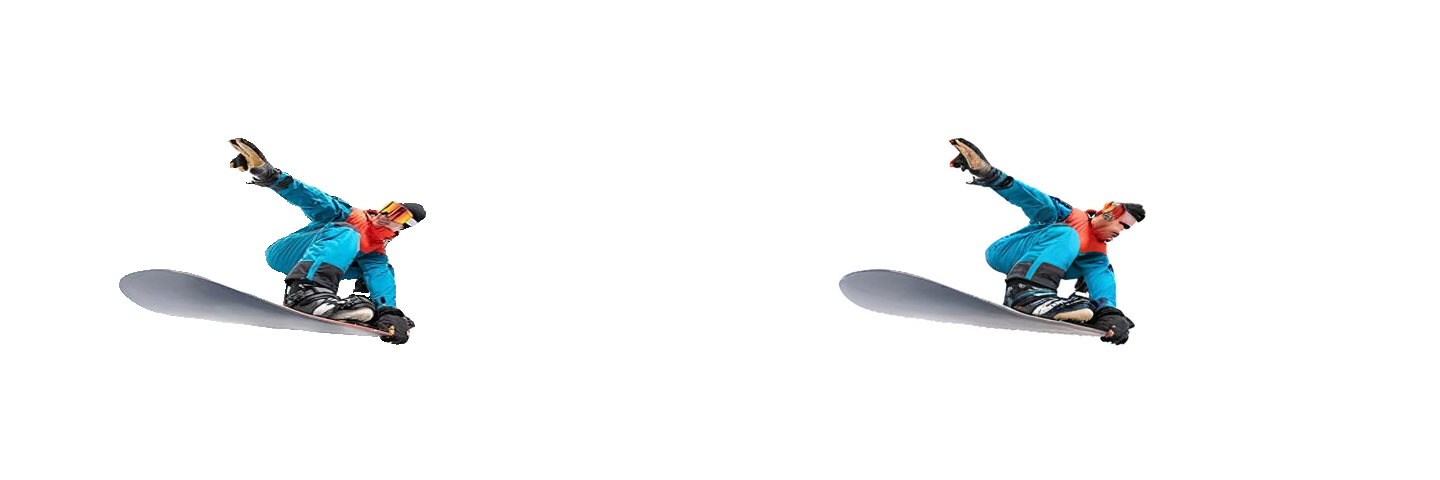

In [16]:
url = "surfer.png"

init_image = load_image(url).convert("RGB")
prompt = "surfer,realistic,16k"
image = pipe(prompt, image=init_image, strength=0.05, guidance_scale=10).images

# image[0]


make_image_grid([init_image, image[0]], rows=1, cols=2)
